In [263]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


class Model:
    def __init__(self, n):
        self.q = np.random.rand(n)
        self.n = n
    
    def predict(self, X):
        return 1 if np.dot(self.q, X) >= 1.5 else 0
    
    def train(self, X, Y, alpha, steps):
        for s in range(1, steps):
            q = np.zeros(self.n)
            for j in range(self.n):
                sum = 0
                for i in range(len(X)):
                    sum += (self.predict(X[i]) - Y[i]) * X[i][j]
                q[j] = sum * alpha / len(X)
            self.q -= q
            
    def test(self, X, Y):
        good = 0
        for i in range(len(X)):
             good += 1 if self.predict(X[i]) == Y[i] else 0
        return good / len(X)

In [265]:
m = Model(7)

In [280]:
#np.random.seed(0)
df = pd.DataFrame(pd.read_csv('data.csv'))
Y = df['Survived'].tolist()
df = df.drop(columns = ['Survived', 'Unnamed: 0'])
X = df.values.tolist()
for i in range(len(X)):
    X[i].append(1)
res = []
res.append(m.test(X[600:], Y[600:]))

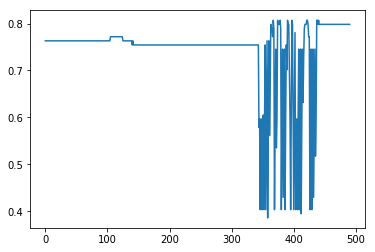

In [295]:
for epoch in range(1, 50):
    m.train(X[:600], Y[:600], 0.1, 2)
    res.append(m.test(X[600:], Y[600:]))
plt.plot(res)
plt.show()

In [296]:
max(res)

0.8070175438596491

In [297]:
res[-1]

0.7982456140350878

In [323]:
df = pd.DataFrame(pd.read_csv('_test.csv'))
df = df.drop(columns = ['Unnamed: 0'])
X = df.values.tolist()
for i in range(len(X)):
    X[i].append(1)
df_ = pd.DataFrame(columns=['PassengerId', 'Survived'])
for i in range(len(X)):
    df_ = df_.append(pd.DataFrame([[i + 892, m.predict(X[i])]], columns = ['PassengerId', 'Survived']))

In [324]:
df_.to_csv('gender_submission.csv', index=False)